In [1]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from skimage.io import imread
from skimage.filters import threshold_otsu
import tensorflow.keras as keras

letters = [
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
            'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
        ]

def read_training_data(training_directory):
    X_train = []
    label = []
    y_train = []
    for letter in letters:
        for each in range(10):
            image_path = os.path.join(training_directory, letter, letter + '_' + str(each) + '.jpg')
            
            #lecture de l'image
            img = imread(image_path, as_gray=True)

            #image_binaire = img < threshold_otsu(img)
            X_train.append(img)
            label.append(letters.index(letter))
            y_train.append(letter)

    return (np.array(X_train), np.array(label))

In [2]:
training_dataset_dir = '/content/drive/Shareddrives/Projets ING3 IA 2021-2022/Deep Learning/Lecture de caractères/train20X20'
(X_train,y_train) = read_training_data(training_dataset_dir)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

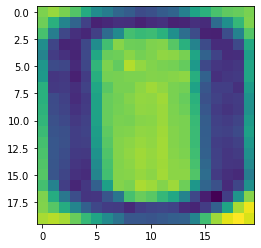

In [33]:
from cv2 import imshow
plt.imshow(X_train[0])


In [ ]:
  plt.subplot(2,3,2),plt.imshow(X_train[0])
  plt.subplot(2,3,1),plt.imshow(X_train[0])
  plt.subplot(2,3,1),plt.imshow(X_train[0])


In [52]:
import pandas as pd
X_train = random.sample(X_train,len(X_train))


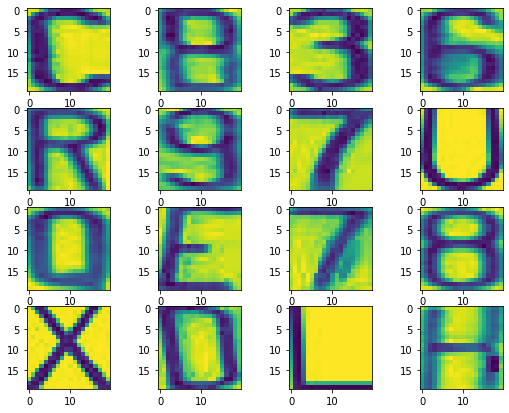

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import random

figure_size = (9,7)
plt.figure(figsize=figure_size)
for i in range(16):
  index = random.randint(0,100)
  plt.subplot(4,4,i+1),plt.imshow(X_train[index])
plt.show()



In [17]:
random_indexes

[6, 4, 4, 5, 2, 9, 3, 6, 7]

In [ ]:
#Modele CNN
nb_classes = len(letters)
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(1, kernel_size=(3, 3), activation="relu", input_shape=(20, 20, 1)))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(nb_classes, activation="softmax"))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 1)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 36)                0         
                                                                 
 dense (Dense)               (None, 34)                1258      
                                                                 
Total params: 1,268
Trainable params: 1,268
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=2000)

Epoch 1/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.3617 - accuracy: 0.7405 - val_loss: 1.7616 - val_accuracy: 0.5686
Epoch 2/2000
10/10 [==============================] - 0s 6ms/step - loss: 1.3616 - accuracy: 0.7405 - val_loss: 1.7673 - val_accuracy: 0.5686
Epoch 3/2000
10/10 [==============================] - 0s 7ms/step - loss: 1.3610 - accuracy: 0.7370 - val_loss: 1.7772 - val_accuracy: 0.5294
Epoch 4/2000
10/10 [==============================] - 0s 6ms/step - loss: 1.3599 - accuracy: 0.7336 - val_loss: 1.7767 - val_accuracy: 0.5294
Epoch 5/2000
10/10 [==============================] - 0s 6ms/step - loss: 1.3592 - accuracy: 0.7197 - val_loss: 1.7778 - val_accuracy: 0.5294
Epoch 6/2000
10/10 [==============================] - 0s 6ms/step - loss: 1.3573 - accuracy: 0.7197 - val_loss: 1.7817 - val_accuracy: 0.5294
Epoch 7/2000
10/10 [==============================] - 0s 7ms/step - loss: 1.3544 - accuracy: 0.7197 - val_loss: 1.7861 - val_accuracy: 0.5490
Epoch

In [ ]:
model.save('data/cnn_model.model')

INFO:tensorflow:Assets written to: data/cnn_model.model/assets


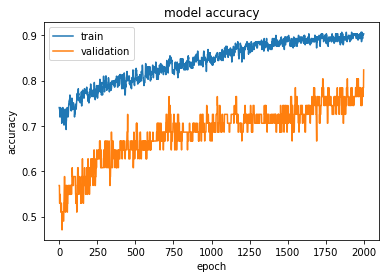

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['trainig', 'validation'], loc='upper left')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('data/cnn_model.pkl')